# **Introducción Data Analisy**

## ETL: TIPOS DE DATOS

In [60]:
import numpy as np
import pandas as pd
import random 
df_datos = pd.read_csv("./data/dataset_ETL_full_aviones.csv")

In [2]:
df_datos.head(5)

,Aircompany,Origen,Destino,Distancia,avion,con_escala,consumo_kg,duracion,ingresos,Id_vuelo,IC,Categoria_IC,Incidencias,Hora_Vuelo
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,2.502900,A,Ave impacta con el avión,23:00 19/04/2023
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,2.628288,A,Sin incidencias,21:15 01/06/2023
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,12.022400,C,Amenaza de seguridad a bordo,10:30 26/03/2023
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,2.673000,A,Sin incidencias,22:00 01/09/2023
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,11.512800,C,Amenaza de seguridad a bordo,15:30 16/02/2023


El proceso para que pensemos en clasificar un dato, columna o característica como categórica (además de que nos lo digan exprofeso) es el de calcular la cardinalidad:

$$Cardinalidad(<Columna/Característica>) = \dfrac{NúmerodeValoresUnicos(<Columna/Característica>)}{NúmeroTotalDeRegistros}* 100\%$$

Por ejemplo, la cardinalidad para Categoria_IC

In [3]:
cardinalidad_IC = len(df_datos["Categoria_IC"].unique())/len(df_datos) * 100
print(cardinalidad_IC)
                      

0.2572898799313894


La de Destino (empleando el método de pandas, `nunique`):

In [4]:
cardinalidad_IC = df_datos["Categoria_IC"].nunique()/len(df_datos) * 100
print(cardinalidad_IC)
                      

0.2572898799313894


Menos del 1%, compara ahora con la de los valores numéricos:

In [5]:
cardinalidad_consumo = df_datos["consumo_kg"].nunique()/len(df_datos) * 100
print(cardinalidad_consumo)

71.09777015437393


Con cardinalidades por debajo del 5-10% ya podríamos considerar el valor o columna como categórico. ¿Y eso por qué es importante? Por dos motivos principales:
1. Para el EDA: Suponen, en general, interesantes columnas o características para hacer agrupaciones y explorarlas 
2. Para Machine y Deep learnnig: Existen métodos de transformación a números bastante potentes y utilizados, por lo que suelen ser buenas características para incluir 

In [6]:
df_viajes = pd.read_csv("./data/df_viajes.csv")

In [7]:
df_viajes

,Id_vuelo,Aircompany,Origen,Destino,Distancia,avion,consumo_kg,duracion,Incidencias
0,Air_PaGi_10737,Airnar,París,Ginebra,411.0,Boeing 737,NaN,51.0,Ave impacta con el avión
1,Fly_BaRo_10737,FlyQ,Bali,Roma,12738.0,Boeing 737,33479.13254400001,1167.0,Sin incidencias
2,Tab_GiLo_11380,TabarAir,Ginebra,Los Angeles,9103.0,Airbus A380,NaN,626.0,Amenaza de seguridad a bordo
3,Mol_PaCi_10737,MoldaviAir,París,Cincinnati,6370.0,Boeing 737,17027.01,503.0,Sin incidencias
4,Tab_CiRo_10747,TabarAir,Cincinnati,Roma,7480.0,Boeing 747,86115.744,518.0,Amenaza de seguridad a bordo
...,...,...,...,...,...,...,...,...,...
995,Pam_LoNu_10747,PamPangea,Londres,Nueva York,5566.0,Boeing 747,"62300,238",391.0,Sin incidencias
996,Mol_MeLo_10747,MoldaviAir,Melbourne,Londres,16900.0,Boeing 747,194854.5664,1326.0,Amenaza de seguridad a bordo
997,Mol_BaPa_10747,MoldaviAir,Bali,París,11980.0,Boeing 747,128983.868,818.0,Condiciones meteorológicas turbias
998,Air_CaCi_10747,Airnar,Cádiz,Cincinnati,6624.0,Boeing 747,72024.0768,461.0,Sin incidencias


### Tratamiento de Strings en pandas

Hay que añadir `str` a nuestra `Series` o columna del `DataFrame` y a partir de ahí podemos utilizar un montón de métodos propios de los strings pero valor a valor de la serie o columna.

In [8]:
df_viajes.Destino.value_counts()

Destino
Cincinnati     125
Bali           122
Londres        111
París          111
Ginebra        102
Nueva York     102
Roma            83
Los Angeles     62
Cádiz           58
Melbourne       52
Barcelona       21
BaRCelONa        2
GiNeBra          2
GINEbRa          2
GINebra          2
GInebra          2
GinEbra          2
GInEBrA          2
GineBra          1
MeLbOurne        1
MelBouRne        1
MelBourne        1
GINEBrA          1
MelBoUrne        1
GiNEbra          1
MELBoURne        1
MELBourNe        1
GINeBrA          1
BARCEloNA        1
MElbOUrnE        1
GiNEBra          1
BarcELONa        1
MElbouRnE        1
GInEBra          1
GInEBRa          1
GinebrA          1
MelboURNe        1
MelbOUrnE        1
BARcelOnA        1
MelBOUrnE        1
GInebRA          1
GINEbRA          1
GIneBra          1
GINebRa          1
MeLbourne        1
GIneBrA          1
MElboUrNe        1
GiNEbRa          1
MeLboURnE        1
GiNebrA          1
GInEbRa          1
GINEBra          1
MELb

In [9]:
#Arreglar mayúsculas y minúsculas en strings

df_viajes["Destino_Corregido"] = df_viajes["Destino"].str.lower().str.capitalize()
df_viajes.Destino_Corregido.value_counts()

Destino_Corregido
Ginebra        131
Cincinnati     125
Bali           122
Londres        111
París          111
Nueva york     102
Roma            83
Melbourne       69
Los angeles     62
Cádiz           58
Barcelona       26
Name: count, dtype: int64

In [10]:
#Para arreglar la columna "consumo_kg" que mezcla strings y floats:
df_viajes["consumo_kg_corregido"] = df_viajes["consumo_kg"].str.replace(",",".").astype("float64") #---> Al aplicar el método .str, las modificaciones solo se aplican a los strings.
df_viajes.info()                                                                                   #---> Los valores NaN se mantienen
                                                                                                   #---> Primero se reemplazan las comas por puntos, después se transforma a float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id_vuelo              1000 non-null   object 
 1   Aircompany            1000 non-null   object 
 2   Origen                1000 non-null   object 
 3   Destino               1000 non-null   object 
 4   Distancia             872 non-null    float64
 5   avion                 1000 non-null   object 
 6   consumo_kg            862 non-null    object 
 7   duracion              853 non-null    float64
 8   Incidencias           1000 non-null   object 
 9   Destino_Corregido     1000 non-null   object 
 10  consumo_kg_corregido  862 non-null    float64
dtypes: float64(3), object(8)
memory usage: 86.1+ KB


Aquí algunos métodos para trabajar strings en pandas:

|             |                  |                  |                  |
|-------------|------------------|------------------|------------------|
|``len()``    | ``lower()``      | ``replace()``  | ``islower()``    | 
|``ljust()``  | ``upper()``      | ``startswith()`` | ``isupper()``    | 
|``rjust()``  | ``find()``       | ``endswith()``   | ``isnumeric()``  | 
|``center()`` | ``rfind()``      | ``isalnum()``    | ``isdecimal()``  | 
|``zfill()``  | ``index()``      | ``isalpha()``    | ``split()``      | 
|``strip()``  | ``rindex()``     | ``isdigit()``    | ``transtalate()``     | 
|``rstrip()`` | ``capitalize()`` | ``isspace()``    | ``partition()``  | 
|``lstrip()`` |  ``swapcase()``  |  ``istitle()``   | ``rpartition()`` |

### Expresiones regulares

Las expresiones regulares son patrones utilizados para encontrar coincidencias en cadenas de texto.

In [11]:
#Ejemplo

import re # para necesidades más complejas regex, pero a nosotros por ahora nos llega con re

texto = "En 2023, la nave espacial CRX-2049 partió de España. En 2049, encontramos vida en Marte. ¡Increíble! Costó $204M, el evento más importante desde el 1969."

print(re.findall(r"[0-9]{4}",texto))
print(re.match(r".*?([A-Z]+?-[0-9]{4})", texto).group(1))


['2023', '2049', '2049', '1969']
CRX-2049


* Existen varias funciones dentro del paquete re que nos permiten aplicar busqueda por patrones (eso que aparece como primer argumento y que es como si el gato se hubiera puesto a pisar el teclado)
* La sintaxis es la misma en general una funcion que se le pasa un patrón y luego una variable de tipo string en la que aplicar el patrón.


#### Funciones básicas
Hay muchas pero te interesan:
* `findall(patron, variable)`, devuelve una lista con todas las partes de la varible que cumplen el patrón
* `match(patron, variable)`, devuelve un objeto con grupos (ahora veremos) con las ocurrencias que cumplen el patrón buscando desde el principio de la variable
* `sub(patron1,patron2, variable)`, devuelve un string con todas las ocurrencias de patron1, que encuentre en variable, sustituidas por patron2

#### Patrones
Esta es la madre del cordero y aquí es donde entramos no sólo en Matrix sino en MatrixFriki++, te dejo [aquí](https://docs.python.org/3/library/re.html) un enlace a todos los patrones sencillos (que se pueden combinar entre sí) y ahora veamos los principales para empezar:  

##### 1. Sencillos
".": Cualquier caracter (si quiero buscar el carácter "." tenemos que poner " \ .")  
"\d": Un dígito cualquiera (o sea de 0 a 9)  
"\D": Un carácter que no es un número  
"\w": Una letra (no incluye signos de puntuación)  
"\W": Un carácter que no es una letra  
"\s": Espacios,tabuladores ("\t"), retornos de carro/linea_nueva ("\n")  
"\S": Un carácter que no sea el anterior.  


In [12]:
# Ejemplos:

# Todas las palabras de 4 caracteres rodeadas por espacios:
print(re.findall(" .... ", texto))  #---> " .... " 4 puntos = 4 caracteres.

# Todos los números de 4 cifras a los que no les siga una letra:
print(re.findall("\d\d\d\d\W" , texto))  #---> "\d" = 1 dígito, "W" = lo que sigue no es una letra.
                                         #---> Está devolviendo los números seguidos de puntos y comas.

# Eliminar todos los espacios y tabuladores:
print(re.sub("\s", "", texto)) #---> sustituye todos los espacios y saltos de linea por "".

[' nave ', ' vida ']
['2023,', '2049 ', '2049,', '1969.']
En2023,lanaveespacialCRX-2049partiódeEspaña.En2049,encontramosvidaenMarte.¡Increíble!Costó$204M,eleventomásimportantedesdeel1969.


##### Anclas

Con lo anterior ya podemos hacer muchas cosas, pero existen unas cuantas "anclas" o modificadores que le dicen a nuestras funciones de expresiones regulares que se comporten de una manera bastante útil:

* "^", Busca al principio de la variable o cadena.
* "$", Busca al final de la variable o cadena.
* "[]", Es válido para cualquiera de los caracteres o patrones dentro de los corchetes (ojo, si quiero buscar el carácter corchete necesito "\[" o "\]")
* "[^ ]", Es válido si no aparece ninguno de los caracteres o patrones dentro de los corchetes
* "|", Es válido para lo que haya a la izquierda o derecha del |
* "()", Lo que encuentres que coincida con el patrón de dentro de los paréntesis forma un grupo

In [13]:
# Ejemplos:

# Encuentra cualquier número de 3 o 4 cifras
print(re.findall("\d\d\d\d|\d\d\d", texto))

# Encuentra cualquier caracter que no sea a, b, ni un número, ni un espacio:
print(re.findall("[^ab\d\ ]", texto))

# Sustituye, las letras e y a por E:
print(re.sub("[ea]","E", texto))



['2023', '2049', '2049', '204', '1969']
['E', 'n', ',', 'l', 'n', 'v', 'e', 'e', 's', 'p', 'c', 'i', 'l', 'C', 'R', 'X', '-', 'p', 'r', 't', 'i', 'ó', 'd', 'e', 'E', 's', 'p', 'ñ', '.', 'E', 'n', ',', 'e', 'n', 'c', 'o', 'n', 't', 'r', 'm', 'o', 's', 'v', 'i', 'd', 'e', 'n', 'M', 'r', 't', 'e', '.', '¡', 'I', 'n', 'c', 'r', 'e', 'í', 'l', 'e', '!', 'C', 'o', 's', 't', 'ó', '$', 'M', ',', 'e', 'l', 'e', 'v', 'e', 'n', 't', 'o', 'm', 'á', 's', 'i', 'm', 'p', 'o', 'r', 't', 'n', 't', 'e', 'd', 'e', 's', 'd', 'e', 'e', 'l', '.']
En 2023, lE nEvE EspEciEl CRX-2049 pErtió dE EspEñE. En 2049, EncontrEmos vidE En MErtE. ¡IncrEíblE! Costó $204M, El EvEnto más importEntE dEsdE El 1969.


##### Cuantificadores

Y aquí de verdad llega la potencia (y también la complejidad mayor):

* "<patrón>*" encuentra 0 o más ocurrencias del patrón <patrón>
* "<patrón>+" encuentra 1 o más ocurrencias del patrón <patrón>
* "<patrón>?" encuentra 0 o 1 ocurrencia del patrón <patrón>
* "<patrón>{(num)}" encuentra exactamente (num) ocurrencias seguidas del patrón <patrón>
* "<patrón>{(numero),(numero2)}" encuentra ocurrencias que se repitan seguidas entre (numero) y (numero2) del <patrón> (si no pones (numero2), es mínimo (numero))
* "[a-z]" encuentra cualquier letra de la "a" a la "z", sólo minúsculas (no acentos, no ñ)
* "[a-zA-Z]" encuentra cualquier letra de la "a" a la "z" o de la "A" a la "Z"
* "[0-9]" encuentra cualquier número del 0 al 9 (equivale a \d)
* "[2-6]" encuentra cualquier número del 2 al 6 (y puedes cambiar el intervalo)
                                               

In [14]:
# Encuentra los números de 4 cifras que estén rodeados por espacios, comas o puntos:
print(re.findall(r"[ ,.]\d{4}[ ,.]", texto))    #---> Te devuelve los números seguidos de comas y puntos.
print(re.findall(r"[ ,.](\d{4})[ ,.]", texto))  #---> Te devuelve solo los números.

# Encuentra las fechas:
print(re.findall(r"[^-]([0-9]{4})[^A-Z]", texto))

# Encuentra el nombre de las naves sabiendo que son tres letras mayúsculas seguidas de un guión y 4 números:
nave = re.match(r".*([A-Z]{3}-\d{4})", texto).group(1)
print(nave)

# Encuentra todas las palabras (sin números) de 4 o más letras que empiecen por e, rodeadas por espacios, puntos o comas:
print(re.findall(r" [eE][a-zA-Z]{3,}", texto))

# Y sólo la palabra
print(re.findall(r" ([eE][a-zA-Z]{3,})", texto))

[' 2023,', ' 2049,', ' 1969.']
['2023', '2049', '1969']
['2023', '2049', '1969']
CRX-2049
[' espacial', ' Espa', ' encontramos', ' evento']
['espacial', 'Espa', 'encontramos', 'evento']


### Sacando provecho de las columnas/campos tipo Texto: Categorización

In [15]:
df_viajes = pd.read_csv("./data/df_viajes.csv")
df_liga  = pd.read_csv("./data/df_liga_2019.csv")

In [16]:
df_viajes.Incidencias.sample(10) #----> .sample(x) saca x valores aleatorios de la columna a la que se aplique.

650                         Discusión a bordo
794                 Aterrizaje de emergencia,
565    Incidencias con las puertas o ventanas
947                           Sin incidencias
886                           Sin incidencias
433                           Sin incidencias
58     Emergencia del motor y Fallo del motor
620                           Sin incidencias
311                           Sin incidencias
137      Condiciones meteorológicas adversas,
Name: Incidencias, dtype: object

In [17]:
df_viajes.Incidencias.value_counts(True) #---> Al añadir True, muestra el porcentaje de cada valor en el dataset.

Incidencias
Sin incidencias                                                      0.445
Mal funcionamiento del tren de aterrizaje                            0.030
Turbulencia severa                                                   0.029
Ave impacta con el avión                                             0.025
Aterrizaje de emergencia                                             0.023
                                                                     ...  
Problemas de navegación,                                             0.001
Sambódromo a bordo y Conflictos entre pasajeros                      0.001
Fallo eléctrico general                                              0.001
Fallo grave de los sistemas de comunicación,                         0.001
Problemas con el catering y Fallo de los sistemas de comunicación    0.001
Name: proportion, Length: 146, dtype: float64

Hay un 44% de los vuelos sin incidendias, se puede usar ese dato para categorizar mejor el dataset.

In [18]:
df_viajes["Hubo_Incidencia"] = df_viajes.Incidencias != "Sin incidencias"
df_viajes.Hubo_Incidencia.value_counts(True)

Hubo_Incidencia
True     0.555
False    0.445
Name: proportion, dtype: float64

In [19]:
# Ahora se puede ver la media del porcentaje de incidencias por compañía
df_viajes.groupby(["Aircompany"])["Hubo_Incidencia"].mean()

Aircompany
Airnar        0.527778
FlyQ          0.531792
MoldaviAir    0.592920
PamPangea     0.500000
TabarAir      0.602620
Name: Hubo_Incidencia, dtype: float64

In [20]:
df_liga

,id_partido,equipo_local,equipo_visitante,Division,Temporada,fecha_dt,goles_local,goles_visitante,arbitro,estadio,odd_1,odd_x,odd_2,Informe_Tarjetas,Asistencia_miles
0,214023,Celta Vigo,Real Madrid,1,2019,2019-08-17 17:00:00,1,3,Javier Estrada,Abanca-Balaídos,4.75,4.20,1.65,Hubo 01 tajetas rojas al equipo visitante;Hubo...,57291
1,214403,Racing Santander,Malaga,2,2019,2019-08-17 18:00:00,0,1,Aitor Gorostegui,Campos de Sport de El Sardinero,2.87,3.10,2.55,Hubo 03 amarillas mostradas al equipo local;Hu...,22027
2,214024,Valencia,Real Sociedad,1,2019,2019-08-17 19:00:00,1,1,Jesús Gil,Estadio de Mestalla,1.66,3.75,5.50,Hubo 4 amarillas mostradas al equipo local;Hub...,17536
3,214404,Almeria,Albacete,2,2019,2019-08-17 19:00:00,3,0,Saúl Ais,Estadio de los Juegos Mediterráneos,2.37,3.10,3.10,Hubo 00 rojas a jugadores visitantes;Hubo 01 a...,44062
4,214026,Villarreal,Granada CF,1,2019,2019-08-17 21:00:00,4,4,Adrián Cordero,Estadio de la Cerámica,1.60,3.80,6.50,Hubo 01 tarjetas amarillas de jugadores visit...,56103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,214853,Alcorcon,Girona,2,2019,2020-07-20 21:00:00,2,0,Juan Pulido,Estadio Santo Domingo,2.37,2.87,3.40,Hubo 0 tajetas rojas al equipo visitante;Hubo ...,46116
588,214863,Zaragoza,Ponferradina,2,2019,2020-07-20 21:00:00,2,1,Dámaso Arcediano,Estadio de la Romareda,2.10,3.30,3.50,Hubo 00 tarjetas amarillas de jugadores visit...,10083
589,214854,Almeria,Malaga,2,2019,2020-07-20 21:00:00,0,0,Saúl Ais,Estadio de los Juegos Mediterráneos,2.10,3.20,3.60,Hubo 2 tarjetas amarillas de jugadores visita...,21714
590,214862,Sporting Gijon,Huesca,2,2019,2020-07-20 21:00:00,0,1,Gorka Sagues,Estadio Municipal El Molinón,3.30,3.10,2.15,Hubo 2 amarillas para jugadores del equipo loc...,31567


In [21]:
df_liga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592 entries, 0 to 591
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_partido        592 non-null    int64  
 1   equipo_local      592 non-null    object 
 2   equipo_visitante  592 non-null    object 
 3   Division          592 non-null    int64  
 4   Temporada         592 non-null    int64  
 5   fecha_dt          592 non-null    object 
 6   goles_local       592 non-null    int64  
 7   goles_visitante   592 non-null    int64  
 8   arbitro           592 non-null    object 
 9   estadio           592 non-null    object 
 10  odd_1             592 non-null    float64
 11  odd_x             592 non-null    float64
 12  odd_2             592 non-null    float64
 13  Informe_Tarjetas  592 non-null    object 
 14  Asistencia_miles  592 non-null    int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 69.5+ KB


In [22]:
df_liga["Informe_Tarjetas"].value_counts()

Informe_Tarjetas
Hubo 02  tarjetas amarillas de jugadores visitantes;Hubo 0 rojas a jugadores visitantes;Hubo 0 tarjetas rojas sobre el equipo local;Hubo 1 amarillas mostradas al equipo local                 2
Hubo 01 tajetas rojas al equipo visitante;Hubo 0 rojas a jugadores del equipo local;Hubo 2 tarjetas amarillas para el equipo visitantes;Hubo 6 amarillas para jugadores del equipo local       1
Hubo 01 rojas a jugadores del equipo local;Hubo 1 tajetas rojas al equipo visitante;Hubo 04  tarjetas amarillas de jugadores visitantes;Hubo 3 amarillas mostradas al equipo local             1
Hubo 03 amarillas mostradas al equipo local;Hubo 0 tajetas rojas al equipo visitante;Hubo 0 rojas a jugadores del equipo local;Hubo 05 tarjetas amarillas para el equipo visitantes            1
Hubo 02 tarjetas amarillas para el equipo visitantes;Hubo 2 amarillas para jugadores del equipo local;Hubo 00 rojas a jugadores del equipo local;Hubo 1 rojas a jugadores visitantes           1
                  

In [23]:
print(df_liga.Informe_Tarjetas.nunique()/len(df_liga)*100) #---> Cardinalidad

99.83108108108108


El campo Informe_Tarjetas es un desastre, vamos a ver como arreglarlo.

1. Todos los informes están divididos en cuatro partes por ";"  
2. En cada parte se informa de las tarjetas rojas o amarillas pare el equipo local o el visitante.   
3. Parece que después del número vienen el tipo de tarjeta (amarilla, roja), a veces acompañado de otras palabras  
2. Después del tipo de tarjeta aparece el equipo o mención al mismo (visintante, visitantes, local, locales)  

In [24]:
ejemplo1 = "Hubo 0 tajetas rojas al equipo visitante"
ejemplo2 = "Hubo 01 rojas a jugadores visitantes"

patron = "Hubo ([0-9]+) .*rojas .* visitante[s]?"
print(re.match(patron, ejemplo1))
print(re.match(patron, ejemplo1).group(1)) #---> .group(1) hace referencia a ([0-9]+), nos devuelve unicamente ese número, el de targetas rojas.
print(re.match(patron, ejemplo2).group(1)) #---> Devuelve el número en formato string
num_tarjetas = int(re.match(patron, ejemplo2).group(1)) #---> Transformar a int.
print(num_tarjetas)

<re.Match object; span=(0, 40), match='Hubo 0 tajetas rojas al equipo visitante'>
0
01
1


In [25]:
# Aplicar el patrón al dataset:
df_liga["Tarjetas_Rojas_Visitante"] = df_liga.Informe_Tarjetas.str.extract(patron).astype("int") #----> .extract saca el valor del patron, se convierte con .astype()

In [26]:
df_liga.Tarjetas_Rojas_Visitante.value_counts(True)

Tarjetas_Rojas_Visitante
0    0.432432
1    0.141892
2    0.131757
3    0.119932
4    0.109797
5    0.038851
6    0.021959
7    0.003378
Name: proportion, dtype: float64

Aquí te dejo otros métodos que sirven para aplicar expresiones regulares a valores string. Ojo recuerda que tienes que poner ".str." antes de invocarlos:

| Method | Description |
|--------|-------------|
| ``match()`` | Call ``re.match()`` on each element, returning a boolean. |
| ``extract()`` | Call ``re.match()`` on each element, returning matched groups as strings.|
| ``findall()`` | Call ``re.findall()`` on each element |
| ``replace()`` | Replace occurrences of pattern with some other string|
| ``contains()`` | Call ``re.search()`` on each element, returning a boolean |
| ``count()`` | Count occurrences of pattern|
| ``split()``   | Equivalent to ``str.split()``, but accepts regexps |
| ``rsplit()`` | Equivalent to ``str.rsplit()``, but accepts regexps |

### Tratamiento de fechas:

In [27]:
import datetime as dt 

In [28]:
df_liga.fecha_dt.dtypes

dtype('O')

In [29]:
fecha = dt.datetime(year = 2023, month = 11, day = 22, hour = 11)
print(fecha)

2023-11-22 11:00:00


In [30]:
# Crear fechas sumando periodos de tiempo
fecha2 = fecha + dt.timedelta(hours = 20)
print(fecha2)

fecha3 = fecha - dt.timedelta(days = 20)
print(fecha3)

2023-11-23 07:00:00
2023-11-02 11:00:00


In [31]:
# Comparar fechas
fecha3 < fecha < fecha2

True

In [32]:
# Encontrar diferencias de tiempo
diferencia = fecha2 - fecha3
print(diferencia)
print(type(diferencia))
print(diferencia.seconds)

20 days, 20:00:00
<class 'datetime.timedelta'>
72000


### Datetime <-> String

Tenemos dos métodos y ambos hacen uso de un patrón de conversión cuyas convenciones puedes encontrar [aquí para strftime](https://strftime.org/) y [aquí para ambos](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior):
* strftime para convertir de `datetime` a `string`
* strptime para convertir de `string` a `datetime`


In [33]:
# Strftime, ejemplo 
fecha.strftime("Hoy es %d de %m de %Y, es %a, y son las %H y %M minutos")
# Puedes usar %d,%m, etc como quieras


'Hoy es 22 de 11 de 2023, es Wed, y son las 11 y 00 minutos'

In [34]:
# Strptime, ejemplo
cadena_con_fecha = 'Hoy es 03 de 11 de 2023, es Fri, y son las 20 y 00 minutos'
patron = "Hoy es %d de %m de %Y, es %a, y son las %H y %M minutos"
fecha_de_string = dt.datetime.strptime(cadena_con_fecha,patron)
print(fecha_de_string)

2023-11-03 20:00:00


CONVERTIR LOS STRINGS DE FECHA DE LA LIGA 

In [35]:
df_liga.fecha_dt.sample(1)

465    2020-06-20 22:00:00
Name: fecha_dt, dtype: object

In [36]:
patron = "%Y-%m-%d %H:%M:%S"

In [37]:
df_liga["FECHA"] = pd.to_datetime(df_liga.fecha_dt)
df_liga.FECHA

0     2019-08-17 17:00:00
1     2019-08-17 18:00:00
2     2019-08-17 19:00:00
3     2019-08-17 19:00:00
4     2019-08-17 21:00:00
              ...        
587   2020-07-20 21:00:00
588   2020-07-20 21:00:00
589   2020-07-20 21:00:00
590   2020-07-20 21:00:00
591   2020-08-07 20:00:00
Name: FECHA, Length: 592, dtype: datetime64[ns]

In [38]:
# Partidos de liga de la temporada 19-20 que se jugaron en 2020
df_liga[df_liga.FECHA > "2020"]

# Partidos de la liga de la temporada que se jugaron en Domingo (Lunes -> 0, Domingo -> 6):
df_liga[df_liga.FECHA.dt.day_of_week == 6]

# Partidos en diciembre de 2019
df_liga[df_liga.FECHA.dt.month == 12]

,id_partido,equipo_local,equipo_visitante,Division,Temporada,fecha_dt,goles_local,goles_visitante,arbitro,estadio,odd_1,odd_x,odd_2,Informe_Tarjetas,Asistencia_miles,Tarjetas_Rojas_Visitante,FECHA
227,214170,Sevilla,Leganes,1,2019,2019-12-01 12:00:00,1,0,Ricardo De Burgos,Estadio Ramón Sánchez Pizjuán,1.57,4.00,6.00,Hubo 00 rojas a jugadores del equipo local;Hub...,12276,0,2019-12-01 12:00:00
228,214592,Fuenlabrada,Cadiz,2,2019,2019-12-01 12:00:00,1,0,Saúl Ais,Estadio Fernando Torres,2.50,3.00,3.00,Hubo 5 amarillas para jugadores del equipo loc...,65512,5,2019-12-01 12:00:00
229,214163,Athletic Club,Granada CF,1,2019,2019-12-01 14:00:00,2,0,Adrián Cordero,San Mamés Barria,1.70,3.40,6.00,Hubo 00 tarjetas rojas sobre el equipo local;H...,54748,0,2019-12-01 14:00:00
230,214166,Espanyol,Osasuna,1,2019,2019-12-01 16:00:00,2,4,Mario Melero,RCDE Stadium,2.15,3.10,3.60,Hubo 0 tarjetas rojas sobre el equipo local;Hu...,47650,0,2019-12-01 16:00:00
231,214597,Oviedo,Rayo Vallecano,2,2019,2019-12-01 16:00:00,2,1,Juan Pulido,Estadio Nuevo Carlos Tartiere,2.70,3.10,2.70,Hubo 0 tarjetas rojas sobre el equipo local;Hu...,19459,0,2019-12-01 16:00:00
232,214593,Lugo,Deportivo La Coruna,2,2019,2019-12-01 18:00:00,0,0,José López,Estadio Anxo Carro,3.10,3.10,2.40,Hubo 02 amarillas mostradas al equipo local;Hu...,43257,2,2019-12-01 18:00:00
233,214590,Elche,Racing Santander,2,2019,2019-12-01 18:00:00,2,0,Jorge Figueroa,Estadio Manuel Martínez Valero,2.05,3.10,4.00,Hubo 0 rojas a jugadores visitantes;Hubo 00 ro...,26837,0,2019-12-01 18:00:00
234,214167,Getafe,Levante,1,2019,2019-12-01 18:30:00,4,0,Javier Estrada,Coliseum Alfonso Pérez,1.66,3.80,5.50,Hubo 00 rojas a jugadores del equipo local;Hub...,32267,0,2019-12-01 18:30:00
235,214591,Extremadura,Las Palmas,2,2019,2019-12-01 20:00:00,0,1,Gorka Sagues,Estadio Francisco de la Hera,2.45,3.00,3.10,Hubo 01 rojas a jugadores visitantes;Hubo 07 t...,98010,1,2019-12-01 20:00:00
236,214164,Atletico Madrid,Barcelona,1,2019,2019-12-01 21:00:00,0,1,Antonio Mateu,Estadio Wanda Metropolitano,2.75,3.30,2.60,Hubo 4 tarjetas amarillas de jugadores visita...,84137,4,2019-12-01 21:00:00


## ETL: Tratamiento de Numeros

In [40]:
def obten_resultado(row):
    goles_local = row["goles_local"]
    goles_visitante = row["goles_visitante"]
    if goles_local > goles_visitante:
        return "1"
    elif goles_local < goles_visitante:
        return "2"
    else:
        return "X"
        

In [45]:
df_liga["Resultado"] = df_liga[["goles_local", "goles_visitante"]].apply(obten_resultado, axis = 1)

print(df_liga.Resultado.value_counts(normalize = True)) #---> Ver el porcentaje
df_liga.head(5)

Resultado
1    0.417230
X    0.304054
2    0.278716
Name: proportion, dtype: float64


,id_partido,equipo_local,equipo_visitante,Division,Temporada,fecha_dt,goles_local,goles_visitante,arbitro,estadio,odd_1,odd_x,odd_2,Informe_Tarjetas,Asistencia_miles,Tarjetas_Rojas_Visitante,FECHA,Resultado
0,214023,Celta Vigo,Real Madrid,1,2019,2019-08-17 17:00:00,1,3,Javier Estrada,Abanca-Balaídos,4.75,4.20,1.65,Hubo 01 tajetas rojas al equipo visitante;Hubo...,57291,1,2019-08-17 17:00:00,2
1,214403,Racing Santander,Malaga,2,2019,2019-08-17 18:00:00,0,1,Aitor Gorostegui,Campos de Sport de El Sardinero,2.87,3.10,2.55,Hubo 03 amarillas mostradas al equipo local;Hu...,22027,3,2019-08-17 18:00:00,2
2,214024,Valencia,Real Sociedad,1,2019,2019-08-17 19:00:00,1,1,Jesús Gil,Estadio de Mestalla,1.66,3.75,5.50,Hubo 4 amarillas mostradas al equipo local;Hub...,17536,4,2019-08-17 19:00:00,X
3,214404,Almeria,Albacete,2,2019,2019-08-17 19:00:00,3,0,Saúl Ais,Estadio de los Juegos Mediterráneos,2.37,3.10,3.10,Hubo 00 rojas a jugadores visitantes;Hubo 01 a...,44062,0,2019-08-17 19:00:00,1
4,214026,Villarreal,Granada CF,1,2019,2019-08-17 21:00:00,4,4,Adrián Cordero,Estadio de la Cerámica,1.60,3.80,6.50,Hubo 01 tarjetas amarillas de jugadores visit...,56103,1,2019-08-17 21:00:00,X


### Binning

Para terminar otra de las posibles transformaciones que podemos hacer es convertir determinados campos con una gran dispersión de valores en grupos o rangos, también llamados "bins" y luego tratar esa nueva columna como una categórica (algo particular porque existe una relación de orden matemático entre los bins, por ejemplo estar en un bin con un índice mayor que otro significa tener más o menos valor, dependiendo la forma en que hayamos hecho el bin)

<Axes: >

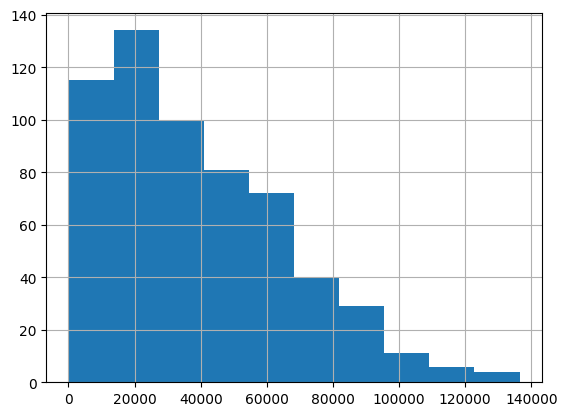

In [46]:
df_liga["Asistencia_miles"].hist()

¿Y cómo se hacen bins en pandas?:

In [48]:
# Indicándole los límites:

bins = [0, 30000, 60000, df_liga.Asistencia_miles.max()] #---> Los valores en los que se hará el corte.
df_liga["Cat_asistencia"] = pd.cut(df_liga.Asistencia_miles, bins, labels = ["baja", "media", "alta"]) #---> asignar etiquetas a los cortes.
df_liga.head(3)

,id_partido,equipo_local,equipo_visitante,Division,Temporada,fecha_dt,goles_local,goles_visitante,arbitro,estadio,odd_1,odd_x,odd_2,Informe_Tarjetas,Asistencia_miles,Tarjetas_Rojas_Visitante,FECHA,Resultado,Cat_asistencia
0,214023,Celta Vigo,Real Madrid,1,2019,2019-08-17 17:00:00,1,3,Javier Estrada,Abanca-Balaídos,4.75,4.20,1.65,Hubo 01 tajetas rojas al equipo visitante;Hubo...,57291,1,2019-08-17 17:00:00,2,media
1,214403,Racing Santander,Malaga,2,2019,2019-08-17 18:00:00,0,1,Aitor Gorostegui,Campos de Sport de El Sardinero,2.87,3.10,2.55,Hubo 03 amarillas mostradas al equipo local;Hu...,22027,3,2019-08-17 18:00:00,2,baja
2,214024,Valencia,Real Sociedad,1,2019,2019-08-17 19:00:00,1,1,Jesús Gil,Estadio de Mestalla,1.66,3.75,5.50,Hubo 4 amarillas mostradas al equipo local;Hub...,17536,4,2019-08-17 19:00:00,X,baja


In [49]:
df_liga.Cat_asistencia.value_counts(normalize = True)

Cat_asistencia
baja     0.452703
media    0.302365
alta     0.244932
Name: proportion, dtype: float64

In [50]:
# Bines de ancho equivalente
bins = 3
df_liga["Cat_Asistencia_2"] = pd.cut(df_liga.Asistencia_miles, bins, labels = ["Baja", "Media", "Alta"])
df_liga.head(3)

,id_partido,equipo_local,equipo_visitante,Division,Temporada,fecha_dt,goles_local,goles_visitante,arbitro,estadio,odd_1,odd_x,odd_2,Informe_Tarjetas,Asistencia_miles,Tarjetas_Rojas_Visitante,FECHA,Resultado,Cat_asistencia,Cat_Asistencia_2
0,214023,Celta Vigo,Real Madrid,1,2019,2019-08-17 17:00:00,1,3,Javier Estrada,Abanca-Balaídos,4.75,4.20,1.65,Hubo 01 tajetas rojas al equipo visitante;Hubo...,57291,1,2019-08-17 17:00:00,2,media,Media
1,214403,Racing Santander,Malaga,2,2019,2019-08-17 18:00:00,0,1,Aitor Gorostegui,Campos de Sport de El Sardinero,2.87,3.10,2.55,Hubo 03 amarillas mostradas al equipo local;Hu...,22027,3,2019-08-17 18:00:00,2,baja,Baja
2,214024,Valencia,Real Sociedad,1,2019,2019-08-17 19:00:00,1,1,Jesús Gil,Estadio de Mestalla,1.66,3.75,5.50,Hubo 4 amarillas mostradas al equipo local;Hub...,17536,4,2019-08-17 19:00:00,X,baja,Baja


## Tratamiento de faltantes

Existen varias alternativas cuando nos encontramos con datos incompletos o *missing data*. Y ahora vamos a ver de una forma teórica el tratamiento pero también de una forma práctica, repasando el dataset que ya utilizamos en la práctica obligatoria final del sprint anterior. Carguemos esos datos en nuestro dataframe.


### Clasificación 

Por su origen, y dificultad para "recuperarlos", los datos faltantes se pueden clasificar en tres categorías:
1. **Missing Completely at Random (MCAR)**. Estos son datos que se pierden de verdad de forma esporádica y aleatoria. La pérdida de datos no tiene que ver con la observación estudiada. Por ejemplo, un sensor que se quede sin batería, un cuestionario perdido en una oficina de correos, o una muestra sanguínea fallida en un laboratorio. En general, como es tan aleatoria la perdida, si no es masiva, son datos que se pueden recuperar o estimar a partir de otras "filas" con datos similares (los que rellenamos con las medidas, etc de otros campos)
2. **Missing at Random (MAR)**. El hecho de la pérdida está relacionado con otra variable. Por ejemplo, telefonos que se estropean y ya no podemos medir su velocidad de acceso a internet. Podemos recuperar ese datos mirando telefonos similares que no se estropean, es peor que el anterior pero aún podemos tratarlo.
3. **Missing not at Random (MNAR)**. Datos incompletos que no se explican por motivos anteriores y que en general no podemos recuperar (estos son candidatos a que los borremos)

En general, si tienes muchos datos, tira los missings, no pierdas el tiempo. Sólo si tus datos son escasos y estás en modo EDA, intenta recuperar, pero ojo si tienes missings, pocos datos y crees que son valiosos los que has perdido, intenta generar nuevos o recuperarlos pero no estimarlos (para Machine Learning, estimar sobre lo que ya existe y luego usarlo como si fuera verdad, es una forma de introducir sesgos "peligrosos", vease ChatsGPTs que aprenden de ChatGPTs)

Y sin aún así quieres "recuperar"...

In [53]:
df_viajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id_vuelo         1000 non-null   object 
 1   Aircompany       1000 non-null   object 
 2   Origen           1000 non-null   object 
 3   Destino          1000 non-null   object 
 4   Distancia        872 non-null    float64
 5   avion            1000 non-null   object 
 6   consumo_kg       862 non-null    object 
 7   duracion         853 non-null    float64
 8   Incidencias      1000 non-null   object 
 9   Hubo_Incidencia  1000 non-null   bool   
dtypes: bool(1), float64(2), object(7)
memory usage: 71.4+ KB


## Aproximaciones para tratar los missings

#### A. Intenta obtenerlos
A veces es posible encontrar los valores incompletos (repitiendo una encuesta, buscando en otras fuentes, etc.). Esto no suele ser lo habitual.

En nuestro dataset era posible para las distancias, ya que teniendo Origen y Destino la distancia no cambia y podemos completar esos campos faltantes.

In [52]:
df_viajes_sin_na = df_viajes.copy()
df_viajes_sin_na["Destino"] = df_viajes_sin_na.Destino.str.lower().str.capitalize() # Primero hay que limpiar, recuerda el ciclo pintado anteriormente

df_viajes_sin_na["Distancia_Corregida"] = df_viajes_sin_na.groupby(["Origen","Destino"])["Distancia"].transform("mean")
df_viajes_sin_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id_vuelo             1000 non-null   object 
 1   Aircompany           1000 non-null   object 
 2   Origen               1000 non-null   object 
 3   Destino              1000 non-null   object 
 4   Distancia            872 non-null    float64
 5   avion                1000 non-null   object 
 6   consumo_kg           862 non-null    object 
 7   duracion             853 non-null    float64
 8   Incidencias          1000 non-null   object 
 9   Hubo_Incidencia      1000 non-null   bool   
 10  Distancia_Corregida  1000 non-null   float64
dtypes: bool(1), float64(3), object(7)
memory usage: 79.2+ KB


### B. Descartar datos, es decir las filas


Omitir los registros (filas) con algún dato faltante y analizar el dataset resultante. Si el tamaño del conjunto de datos es grande, y no hay demasiados missing values, puede ser una estrategia válida. Sin embargo, cuando no tenemos muchos datos o no se satisface MCAR, no es la mejor aproximación, y puede causar sesgo en los datos. 

Aún así, cómo hacerlo con Pandas, recordamos que en la práctica nuestro criterio fue descartar las filas que tenían missing en los tres campos, ¿por qué? Porque tenían demasiado "error", rellenarlos con estimaciones (medias, modas, modelos de IA, etc) no tienen sentido porque convierte al dato en demasiado "artificial". Hagámoslo:

In [55]:
df_viajes_sin_na_I = df_viajes.dropna(subset = ["Distancia","consumo_kg","duracion"], how = "all")
df_viajes_sin_na_I.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id_vuelo         997 non-null    object 
 1   Aircompany       997 non-null    object 
 2   Origen           997 non-null    object 
 3   Destino          997 non-null    object 
 4   Distancia        872 non-null    float64
 5   avion            997 non-null    object 
 6   consumo_kg       862 non-null    object 
 7   duracion         853 non-null    float64
 8   Incidencias      997 non-null    object 
 9   Hubo_Incidencia  997 non-null    bool   
dtypes: bool(1), float64(2), object(7)
memory usage: 78.9+ KB


In [58]:
condicion = (df_viajes_sin_na_I["duracion"].isna()) & (df_viajes_sin_na_I["consumo_kg"].isna()) & (df_viajes_sin_na_I["Distancia"].isna())
df_viajes_sin_na_I[condicion]

,Id_vuelo,Aircompany,Origen,Destino,Distancia,avion,consumo_kg,duracion,Incidencias,Hubo_Incidencia


### Eliminar campos
Si una variable tiene muchos missings, una opción puede ser eliminar la columna del dataset. Por ejemplo, una variable con el 99% de nulos, no aportará mucha información y podremos eliminarla. En cualquier caso, es una decisión que hay que tomar con cuidado, y depende de cada caso.  

Para saber cual es la prorporción de nulos, acudíamos a:

In [61]:
df_viajes["duracion"].value_counts(normalize = True, dropna = False)[np.NaN]

0.147

In [62]:
df_viajes["consumo_kg"].value_counts(normalize = True, dropna = False)[np.NaN]

0.138

In [63]:
df_viajes["Distancia"].value_counts(normalize = True, dropna = False)[np.NaN]

0.128

In [65]:
df_viajes_sin_na_II = df_viajes.drop(columns=["consumo_kg"])
df_viajes_sin_na_II

,Id_vuelo,Aircompany,Origen,Destino,Distancia,avion,duracion,Incidencias,Hubo_Incidencia
0,Air_PaGi_10737,Airnar,París,Ginebra,411.0,Boeing 737,51.0,Ave impacta con el avión,True
1,Fly_BaRo_10737,FlyQ,Bali,Roma,12738.0,Boeing 737,1167.0,Sin incidencias,False
2,Tab_GiLo_11380,TabarAir,Ginebra,Los Angeles,9103.0,Airbus A380,626.0,Amenaza de seguridad a bordo,True
3,Mol_PaCi_10737,MoldaviAir,París,Cincinnati,6370.0,Boeing 737,503.0,Sin incidencias,False
4,Tab_CiRo_10747,TabarAir,Cincinnati,Roma,7480.0,Boeing 747,518.0,Amenaza de seguridad a bordo,True
...,...,...,...,...,...,...,...,...,...
995,Pam_LoNu_10747,PamPangea,Londres,Nueva York,5566.0,Boeing 747,391.0,Sin incidencias,False
996,Mol_MeLo_10747,MoldaviAir,Melbourne,Londres,16900.0,Boeing 747,1326.0,Amenaza de seguridad a bordo,True
997,Mol_BaPa_10747,MoldaviAir,Bali,París,11980.0,Boeing 747,818.0,Condiciones meteorológicas turbias,True
998,Air_CaCi_10747,Airnar,Cádiz,Cincinnati,6624.0,Boeing 747,461.0,Sin incidencias,False


### Media, Mediana y Moda
En lugar de eliminar, reemplazamos valores missing con estimaciones estadísticas como la media, la moda o la mediana.  En una sustitución por la media, el valor medio de una variable se usa en lugar del valor de los datos que faltan para esa misma variable. Esto tiene la ventaja de no cambiar la media muestral de esa variable. Sin embargo, con valores faltantes que no son estrictamente aleatorios, especialmente en presencia de una gran desigualdad en el número de valores faltantes para las diferentes variables, el método de sustitución de medias puede conducir a un sesgo inconsistente.

Este es el método que sugeríamos en las unidades dedicadas a Pandas, pero ten en cuenta que como se dice anteriormente se introduce sesgo. En cualquier caso, y como vimos en la práctica se puede hilar fino empleando la media de agrupaciones.


In [66]:
df_viajes_sin_na_IV = df_viajes.copy()
df_viajes_sin_na_IV["consumo_kg"] = df_viajes_sin_na_IV["consumo_kg"].str.replace(",",".").astype("float") # Primero limpiar
df_viajes_sin_na_IV["consumo_kg_medio"] = df_viajes_sin_na_IV.groupby(["Aircompany","avion"])["consumo_kg"].transform("mean")
df_viajes_sin_na_IV.loc[df_viajes_sin_na_IV.consumo_kg.isna(),"consumo_kg"] =\
      df_viajes_sin_na_IV.loc[df_viajes_sin_na_IV.consumo_kg.isna(),"consumo_kg_medio"]
df_viajes_sin_na_IV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id_vuelo          1000 non-null   object 
 1   Aircompany        1000 non-null   object 
 2   Origen            1000 non-null   object 
 3   Destino           1000 non-null   object 
 4   Distancia         872 non-null    float64
 5   avion             1000 non-null   object 
 6   consumo_kg        1000 non-null   float64
 7   duracion          853 non-null    float64
 8   Incidencias       1000 non-null   object 
 9   Hubo_Incidencia   1000 non-null   bool   
 10  consumo_kg_medio  1000 non-null   float64
dtypes: bool(1), float64(4), object(6)
memory usage: 79.2+ KB


### Añadir variable binaria indicando NaNs
Como complemento a estimar los valores perdidos o NaN, podemos capturar el hecho de que es un missings re-estimado creando una variable binaria adicional indicando si era un valor missing (1, True) o no (0, False). Esto nos permitira descontarlos en casos que no queramos contar con ellos o tenerlos en cuenta en casos que sí con solo filtrar o no por ese campo adicional.

IMPORTANTE: Esto se tiene que hacer antes de reimputar o estimar los missing, después ya no se sabrá cuales lo eran o no. O tratar con una copia como hemos hecho nosotros.


In [67]:
df_viajes_sin_na_IV["Era_missing_consumo_kg"] = df_viajes.consumo_kg.isna() # Como están alineados nos podemos permitir esto

In [68]:
# Para cualquier calculo que no queramos usar los valores que eran missing:
df_viajes_sin_na_IV.loc[df_viajes_sin_na_IV.Era_missing_consumo_kg == False] # y operamos con el resultado de este filtrado

,Id_vuelo,Aircompany,Origen,Destino,Distancia,avion,consumo_kg,duracion,Incidencias,Hubo_Incidencia,consumo_kg_medio,Era_missing_consumo_kg
1,Fly_BaRo_10737,FlyQ,Bali,Roma,12738.0,Boeing 737,33479.132544,1167.0,Sin incidencias,False,19625.167545,False
3,Mol_PaCi_10737,MoldaviAir,París,Cincinnati,6370.0,Boeing 737,17027.010000,503.0,Sin incidencias,False,30645.282695,False
4,Tab_CiRo_10747,TabarAir,Cincinnati,Roma,7480.0,Boeing 747,86115.744000,518.0,Amenaza de seguridad a bordo,True,57244.692000,False
5,Mol_CaMe_10737,MoldaviAir,Cádiz,Melbourne,20029.0,Boeing 737,53148.153240,NaN,Sin incidencias,False,30645.282695,False
6,Mol_PaLo_11320,MoldaviAir,París,Londres,344.0,Airbus A320,915.246400,44.0,"Incidencias con el suministro de combustible,",True,8395.822284,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Pam_LoNu_10747,PamPangea,Londres,Nueva York,5566.0,Boeing 747,62300.238000,391.0,Sin incidencias,False,136578.780816,False
996,Mol_MeLo_10747,MoldaviAir,Melbourne,Londres,16900.0,Boeing 747,194854.566400,1326.0,Amenaza de seguridad a bordo,True,132384.256186,False
997,Mol_BaPa_10747,MoldaviAir,Bali,París,11980.0,Boeing 747,128983.868000,818.0,Condiciones meteorológicas turbias,True,132384.256186,False
998,Air_CaCi_10747,Airnar,Cádiz,Cincinnati,6624.0,Boeing 747,72024.076800,461.0,Sin incidencias,False,83111.282099,False


### Otras técnicas
Además de las indicadas, existen otras técnicas más complejas para la imputación de missings, basadas en modelos de Machine Learning, las cuales consisten en predecir un missing en función de otras variables, que se aconsejan sólo para EDA (esto es cosa mía, de Jaime, pero como no habemos visto Machine Learning no lo haréis hasta el bloque siguiente...)